In [18]:
# ============= PREAMBLE =============
# Last Edited By: Luca Carnegie
# Date: March 28, 2025
# Description: Script that creates some visualizations of the data
# ====================================

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
from datetime import datetime


# Read in data
historic = pd.read_csv('../data/analysis_data/historic_bloom.csv')
modern = pd.read_csv('../data/analysis_data/modern_bloom.csv')

# Drop NaN values
historic = historic.dropna()
modern = modern.dropna()

Historic Data

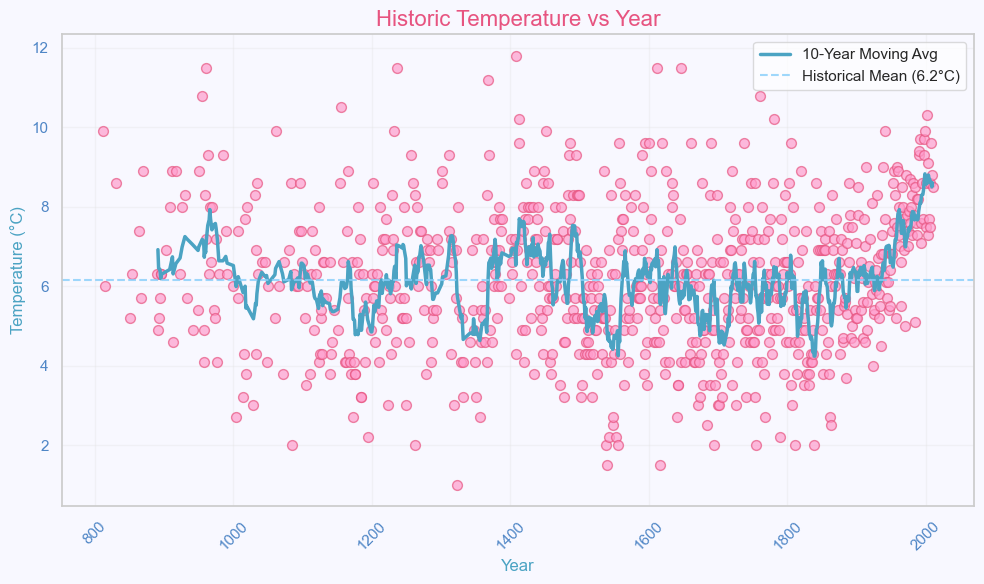

In [24]:
# Scatterplot of historic temp vs years 
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a custom pink/light blue color palette
pink_blue_colors = ['#FF9ECD', '#87CEFA']  # Light pink and light blue
custom_cmap = LinearSegmentedColormap.from_list('pink_blue', pink_blue_colors)

# Scatter plot with pink color
plt.scatter(historic['year'], historic['avg_temp_march_c'], alpha=0.7, color='#FF9ECD', edgecolor='#E75480', s=50)

# Add moving average line in light blue
historic['moving_avg'] = historic['avg_temp_march_c'].rolling(window=10).mean()
plt.plot(historic['year'], historic['moving_avg'], color='#4BA3C3', linewidth=2.5, label='10-Year Moving Avg')

# Add reference line for mean temperature
mean_temp = historic['avg_temp_march_c'].mean()
plt.axhline(y=mean_temp, color='#87CEFA', linestyle='--', alpha=0.8, 
            label=f'Historical Mean ({mean_temp:.1f}°C)')

plt.legend(framealpha=0.7)

# Customize the plot with pink/blue theme
plt.title('Historic Temperature vs Year', fontsize=16, color='#E75480')
plt.xlabel('Year', fontsize=12, color='#4BA3C3')
plt.ylabel('Temperature (°C)', fontsize=12, color='#4BA3C3')
plt.xticks(rotation=45, color='#4F86C6')
plt.yticks(color='#4F86C6')
plt.grid(True, alpha=0.3, color='#E0E0E0')

# Add pink/blue background touches
plt.gca().set_facecolor('#F8F8FF')  # Light background
plt.gcf().set_facecolor('#F8F8FF')

plt.tight_layout()
plt.show()

C:\Users\lucac\AppData\Local\Temp\ipykernel_18868\806787370.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(framealpha=0.7)


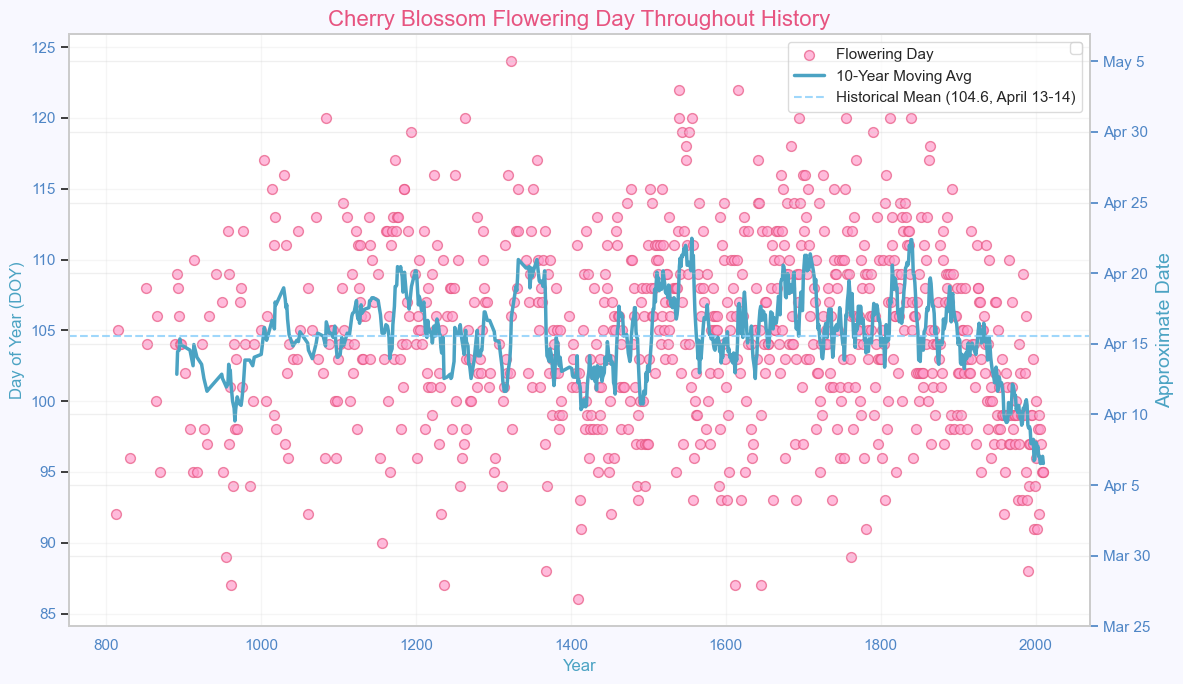

In [ ]:
# Scatterplot of historic year vs flowering day
plt.figure(figsize=(12, 7))

# Filter out NaN values
filtered_historic = historic.dropna(subset=['flower_doy'])

# Create scatter plot with pink color
plt.scatter(filtered_historic['year'], filtered_historic['flower_doy'], alpha=0.7, color='#FF9ECD', 
            edgecolor='#E75480', s=50, label='Flowering Day')

# Add moving average line with light blue color
window_size = 10  # 10-year moving average
filtered_historic['moving_avg_doy'] = filtered_historic['flower_doy'].rolling(window=window_size).mean()
plt.plot(filtered_historic['year'], filtered_historic['moving_avg_doy'], color='#4BA3C3', linewidth=2.5, 
         label=f'{window_size}-Year Moving Avg')

# Add reference line for mean with light blue
plt.axhline(y=mean_doy, color='#87CEFA', linestyle='--', alpha=0.8, 
            label=f'Historical Mean ({mean_doy:.1f}, April 13-14)')

# Customize the plot with pink/blue theme
plt.title('Cherry Blossom Flowering Day Throughout History', fontsize=16, color='#E75480')
plt.xlabel('Year', fontsize=12, color='#4BA3C3')
plt.ylabel('Day of Year (DOY)', fontsize=12, color='#4BA3C3')
plt.grid(True, alpha=0.3, color='#E0E0E0')
plt.xticks(color='#4F86C6')
plt.yticks(color='#4F86C6')
plt.legend(framealpha=0.7)

# Create a secondary y-axis with date labels
ax = plt.gca()
ax2 = ax.twinx()

# Get the current y-limits from the primary axis
y_min, y_max = ax.get_ylim()

# Create properly aligned DOY-to-date mapping
# In a non-leap year:
# DOY 90 = March 31
# DOY 91 = April 1
# DOY 121 = May 1

doy_values = np.arange(int(y_min), int(y_max) + 1, 5)  # Create ticks every 5 days
date_labels = []

for doy in doy_values:
    if doy < 90:
        # DOYs below 90 (March 31)
        day_in_mar = doy - 59  # 59 = DOYs in Jan (31) + Feb (28)
        date_labels.append(f'Mar {day_in_mar}')
    elif doy < 120:
        # DOYs for April (90-119)
        day_in_apr = doy - 90 + 1
        date_labels.append(f'Apr {day_in_apr}')
    elif doy < 151:
        # DOYs for May (120-150)
        day_in_may = doy - 120 + 1
        date_labels.append(f'May {day_in_may}')
    else:
        # DOYs for June and beyond
        day_in_jun = doy - 151 + 1
        date_labels.append(f'Jun {day_in_jun}')

# Set the properly aligned ticks and labels
ax2.set_ylim(y_min, y_max)
ax2.set_yticks(doy_values)
ax2.set_yticklabels(date_labels)
ax2.set_ylabel('Approximate Date', color='#4BA3C3', fontsize=14)
ax2.tick_params(axis='y', colors='#4F86C6')

plt.legend(framealpha=0.7)
plt.grid(True, alpha=0.3, axis='y')


# Add pink/blue background touches
plt.gca().set_facecolor('#F8F8FF')  # Light background
plt.gcf().set_facecolor('#F8F8FF')

plt.tight_layout()
plt.show()

C:\Users\lucac\AppData\Local\Temp\ipykernel_18868\4182396187.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='century_label', y='flower_doy', data=historic,
C:\Users\lucac\AppData\Local\Temp\ipykernel_18868\4182396187.py:89: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(framealpha=0.7)


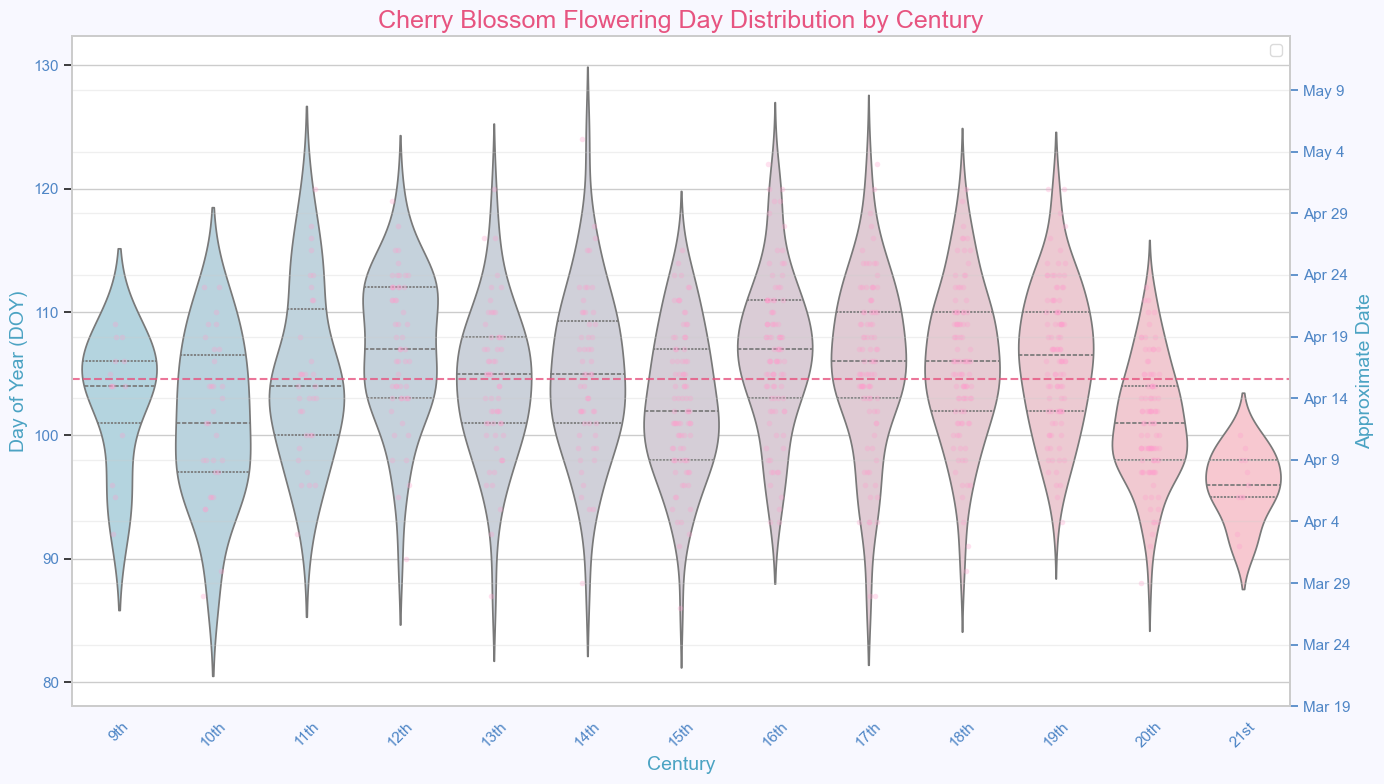

In [42]:
from matplotlib.colors import LinearSegmentedColormap

# Create a figure
plt.figure(figsize=(14, 8))

# Assuming 'historic' is your DataFrame with the data
# Make sure your data has these columns: 'century_label', 'flower_doy'

# Define correct century order with 9th century first
century_order = ['9th', '10th', '11th', '12th', '13th', '14th', '15th', 
                '16th', '17th', '18th', '19th', '20th', '21st']

# Create a custom color palette that transitions from light blue to pink
start_color = '#ADD8E6'  # Light blue
end_color = '#FFC0CB'    # Light pink

# Generate a custom colormap
n_colors = len(century_order)
colors = [start_color, end_color]
cmap_name = 'blue_to_pink'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_colors)

# Get the colors for each century
custom_palette = {}
for i, century in enumerate(century_order):
    custom_palette[century] = cm(i/float(n_colors-1))

# Plot the violin plot with the custom order and palette
sns.violinplot(x='century_label', y='flower_doy', data=historic, 
               palette=custom_palette, inner='quartile', order=century_order)

# Add individual data points with small jitter
sns.stripplot(x='century_label', y='flower_doy', data=historic, 
              color='#FF9ECD', alpha=0.3, jitter=True, size=4, order=century_order)

# Add reference line for mean flowering day (assuming mean_doy is defined elsewhere)
mean_doy = historic['flower_doy'].mean()  # Calculate if not already defined
plt.axhline(y=mean_doy, color='#E75480', linestyle='--', alpha=0.8, 
            label=f'Historical Mean ({mean_doy:.1f}, April 14)')

# Enhance visuals
plt.title('Cherry Blossom Flowering Day Distribution by Century', fontsize=18, color='#E75480')
plt.xlabel('Century', fontsize=14, color='#4BA3C3')
plt.ylabel('Day of Year (DOY)', fontsize=14, color='#4BA3C3')
plt.xticks(rotation=45, color='#4F86C6')
plt.yticks(color='#4F86C6')

# Create a secondary y-axis with date labels
ax = plt.gca()
ax2 = ax.twinx()

# Get the current y-limits from the primary axis
y_min, y_max = ax.get_ylim()

# Create properly aligned DOY-to-date mapping
# In a non-leap year:
# DOY 90 = March 31
# DOY 91 = April 1
# DOY 121 = May 1

doy_values = np.arange(int(y_min), int(y_max) + 1, 5)  # Create ticks every 5 days
date_labels = []

for doy in doy_values:
    if doy < 90:
        # DOYs below 90 (March 31)
        day_in_mar = doy - 59  # 59 = DOYs in Jan (31) + Feb (28)
        date_labels.append(f'Mar {day_in_mar}')
    elif doy < 120:
        # DOYs for April (90-119)
        day_in_apr = doy - 90 + 1
        date_labels.append(f'Apr {day_in_apr}')
    elif doy < 151:
        # DOYs for May (120-150)
        day_in_may = doy - 120 + 1
        date_labels.append(f'May {day_in_may}')
    else:
        # DOYs for June and beyond
        day_in_jun = doy - 151 + 1
        date_labels.append(f'Jun {day_in_jun}')

# Set the properly aligned ticks and labels
ax2.set_ylim(y_min, y_max)
ax2.set_yticks(doy_values)
ax2.set_yticklabels(date_labels)
ax2.set_ylabel('Approximate Date', color='#4BA3C3', fontsize=14)
ax2.tick_params(axis='y', colors='#4F86C6')

plt.legend(framealpha=0.7)
plt.grid(True, alpha=0.3, axis='y')

# Set background color
plt.gca().set_facecolor('#F8F8FF')
plt.gcf().set_facecolor('#F8F8FF')

plt.tight_layout()
plt.show()

Modern Data

C:\Users\lucac\AppData\Local\Temp\ipykernel_18868\1183614019.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(framealpha=0.7)


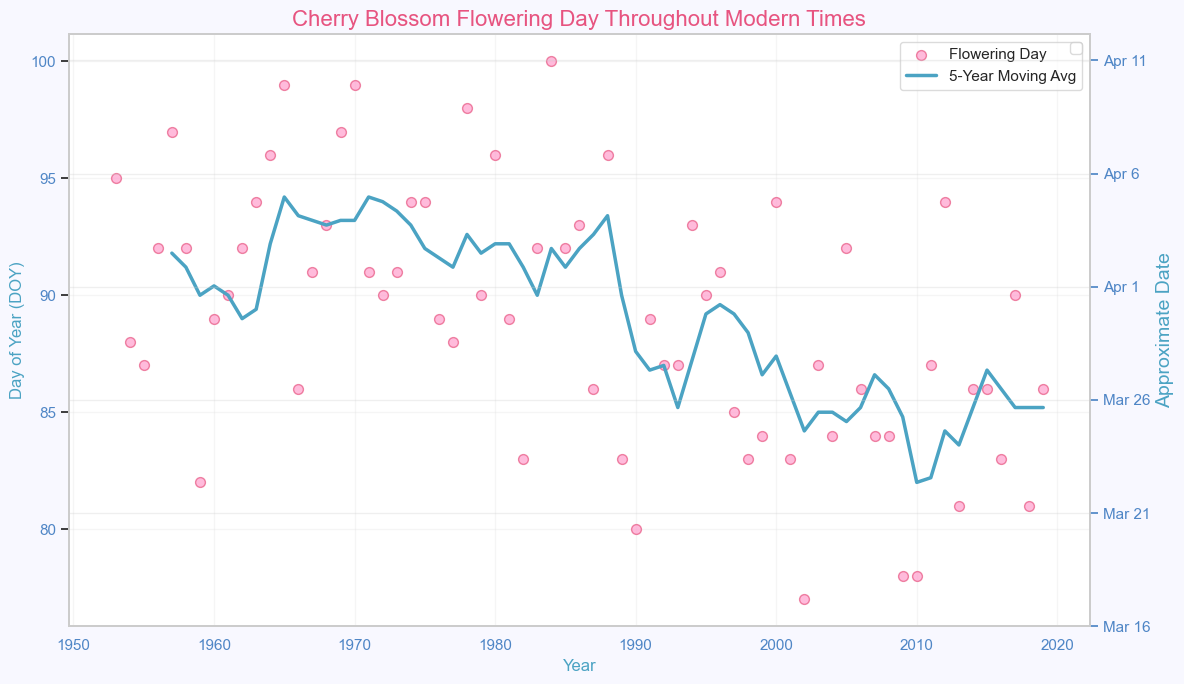

In [ ]:
# Scatterplot of modern year vs flowering day
plt.figure(figsize=(12, 7))

# Filter out NaN values
filtered_modern = modern.dropna(subset=['flower_doy'])

# Create scatter plot with pink color
plt.scatter(filtered_modern['year'], filtered_modern['flower_doy'], alpha=0.7, color='#FF9ECD', 
            edgecolor='#E75480', s=50, label='Flowering Day')

# Add moving average line with light blue color
window_size = 5  # 5-year moving average
filtered_modern['moving_avg_doy'] = filtered_modern['flower_doy'].rolling(window=window_size).mean()
plt.plot(filtered_modern['year'], filtered_modern['moving_avg_doy'], color='#4BA3C3', linewidth=2.5, 
         label=f'{window_size}-Year Moving Avg')

# Customize the plot with pink/blue theme
plt.title('Cherry Blossom Flowering Day Throughout Modern Times', fontsize=16, color='#E75480')
plt.xlabel('Year', fontsize=12, color='#4BA3C3')
plt.ylabel('Day of Year (DOY)', fontsize=12, color='#4BA3C3')
plt.grid(True, alpha=0.3, color='#E0E0E0')
plt.xticks(color='#4F86C6')
plt.yticks(color='#4F86C6')
plt.legend(framealpha=0.7)

# Create a secondary y-axis with date labels
ax = plt.gca()
ax2 = ax.twinx()

# Get the current y-limits from the primary axis
y_min, y_max = ax.get_ylim()

# Create properly aligned DOY-to-date mapping
# In a non-leap year:
# DOY 90 = March 31
# DOY 91 = April 1
# DOY 121 = May 1

doy_values = np.arange(int(y_min), int(y_max) + 1, 5)  # Create ticks every 5 days
date_labels = []

for doy in doy_values:
    if doy < 90:
        # DOYs below 90 (March 31)
        day_in_mar = doy - 59  # 59 = DOYs in Jan (31) + Feb (28)
        date_labels.append(f'Mar {day_in_mar}')
    elif doy < 120:
        # DOYs for April (90-119)
        day_in_apr = doy - 90 + 1
        date_labels.append(f'Apr {day_in_apr}')
    elif doy < 151:
        # DOYs for May (120-150)
        day_in_may = doy - 120 + 1
        date_labels.append(f'May {day_in_may}')
    else:
        # DOYs for June and beyond
        day_in_jun = doy - 151 + 1
        date_labels.append(f'Jun {day_in_jun}')

# Set the properly aligned ticks and labels
ax2.set_ylim(y_min, y_max)
ax2.set_yticks(doy_values)
ax2.set_yticklabels(date_labels)
ax2.set_ylabel('Approximate Date', color='#4BA3C3', fontsize=14)
ax2.tick_params(axis='y', colors='#4F86C6')

plt.legend(framealpha=0.7)
plt.grid(True, alpha=0.3, axis='y')


# Add pink/blue background touches
plt.gca().set_facecolor('#F8F8FF')  # Light background
plt.gcf().set_facecolor('#F8F8FF')

plt.tight_layout()
plt.show()


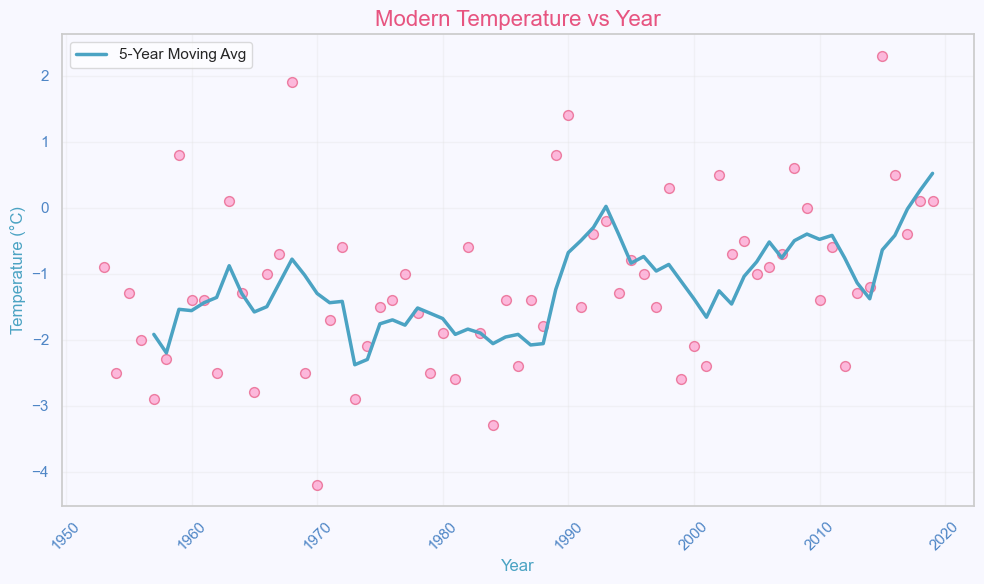

In [48]:
# scatterplot of modern data - year vs. Temperature

# Scatterplot of modern temp vs years 
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a custom pink/light blue color palette
pink_blue_colors = ['#FF9ECD', '#87CEFA']  # Light pink and light blue
custom_cmap = LinearSegmentedColormap.from_list('pink_blue', pink_blue_colors)

# Scatter plot with pink color
plt.scatter(modern['year'], modern['avg_temp_march_c'], alpha=0.7, color='#FF9ECD', edgecolor='#E75480', s=50)

# Add moving average line in light blue
modern['moving_avg'] = modern['avg_temp_march_c'].rolling(window=5).mean()  # Using 5-year window for modern data
plt.plot(modern['year'], modern['moving_avg'], color='#4BA3C3', linewidth=2.5, label='5-Year Moving Avg')

plt.legend(framealpha=0.7)

# Customize the plot with pink/blue theme
plt.title('Modern Temperature vs Year', fontsize=16, color='#E75480')
plt.xlabel('Year', fontsize=12, color='#4BA3C3')
plt.ylabel('Temperature (°C)', fontsize=12, color='#4BA3C3')
plt.xticks(rotation=45, color='#4F86C6')
plt.yticks(color='#4F86C6')
plt.grid(True, alpha=0.3, color='#E0E0E0')

# Add pink/blue background touches
plt.gca().set_facecolor('#F8F8FF')  # Light background
plt.gcf().set_facecolor('#F8F8FF')

plt.tight_layout()
plt.show()

C:\Users\lucac\AppData\Local\Temp\ipykernel_18868\1455753488.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(framealpha=0.7)


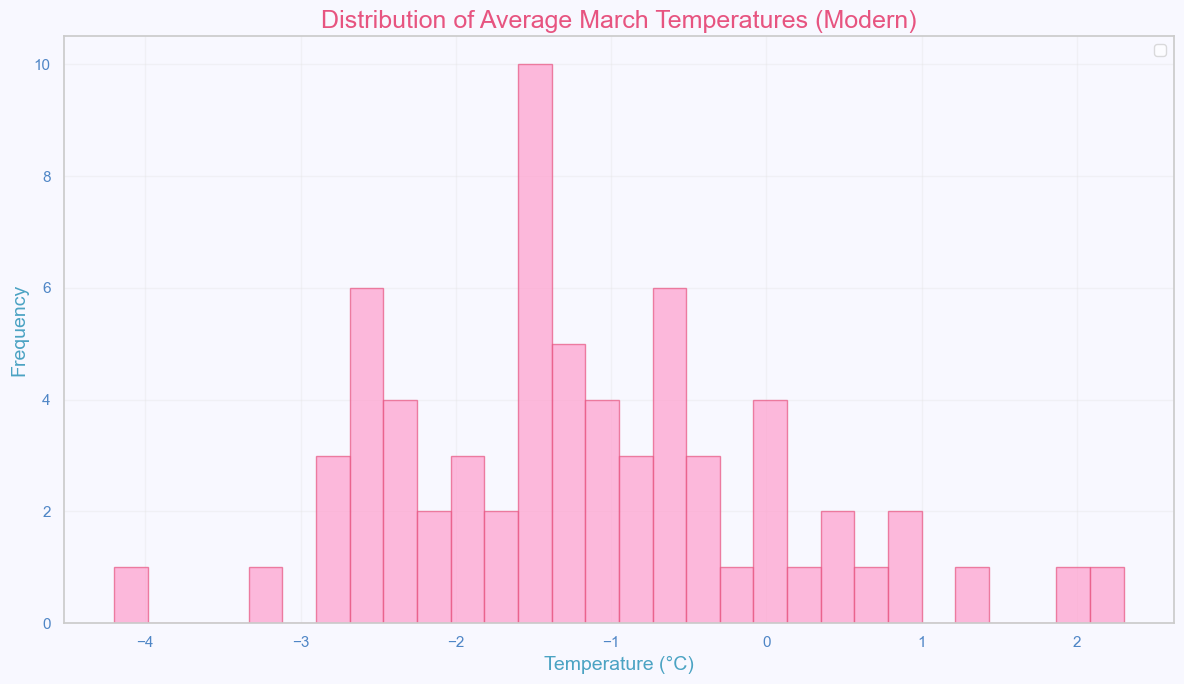

In [51]:
# histogram of temperatures
plt.figure(figsize=(12, 7))
plt.hist(modern['avg_temp_march_c'], bins=30, color='#FF9ECD', edgecolor='#E75480', alpha=0.7)
plt.title('Distribution of Average March Temperatures (Modern)', fontsize=18, color='#E75480')
plt.xlabel('Temperature (°C)', fontsize=14, color='#4BA3C3')
plt.ylabel('Frequency', fontsize=14, color='#4BA3C3')
plt.xticks(color='#4F86C6')
plt.yticks(color='#4F86C6')
plt.legend(framealpha=0.7)
plt.grid(True, alpha=0.3, color='#E0E0E0')
plt.gca().set_facecolor('#F8F8FF')  # Light background
plt.gcf().set_facecolor('#F8F8FF')
plt.tight_layout()
plt.show()

C:\Users\lucac\AppData\Local\Temp\ipykernel_18868\439899125.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(framealpha=0.7)


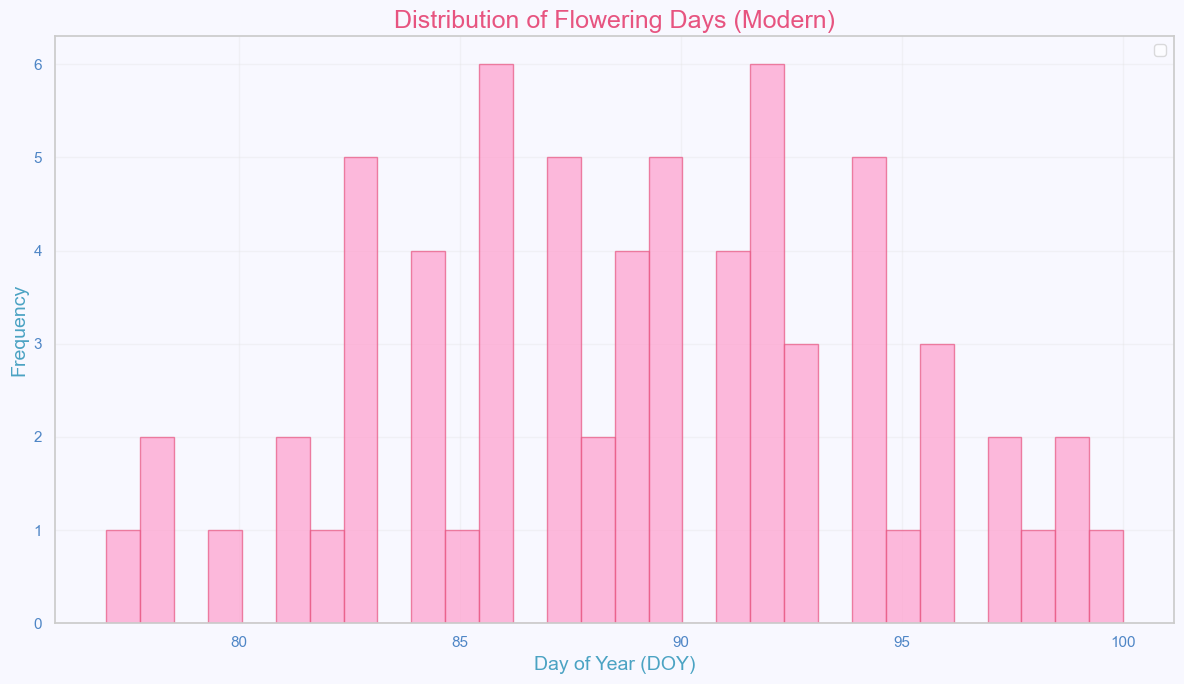

In [52]:
# histogram of flowering days
plt.figure(figsize=(12, 7))
plt.hist(modern['flower_doy'], bins=30, color='#FF9ECD', edgecolor='#E75480', alpha=0.7)
plt.title('Distribution of Flowering Days (Modern)', fontsize=18, color='#E75480')
plt.xlabel('Day of Year (DOY)', fontsize=14, color='#4BA3C3')
plt.ylabel('Frequency', fontsize=14, color='#4BA3C3')
plt.xticks(color='#4F86C6')
plt.yticks(color='#4F86C6')
plt.legend(framealpha=0.7)
plt.grid(True, alpha=0.3, color='#E0E0E0')
plt.gca().set_facecolor('#F8F8FF')  # Light background
plt.gcf().set_facecolor('#F8F8FF')
plt.tight_layout()
plt.show()

